In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import PolynomialFeatures

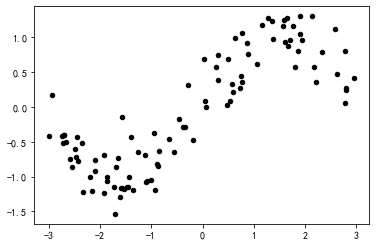

In [3]:
rng = np.random.RandomState(420)
X = rng.uniform(-3, 3, 100)

y = np.sin(X) + rng.normal(size=len(X)) / 3 #random.normal，生成size个服从正态分布的随机数
#使用散点图观察建立的数据集是什么样子
plt.scatter(X, y,marker='o',c='k',s=20)
plt.show()

In [4]:
#为后续建模做准备：sklearn只接受二维以上数组作为特征矩阵的输入
X.shape
X = X.reshape(-1, 1)

In [5]:
#使用原始数据进行建模
LinearR = LinearRegression().fit(X, y)
TreeR = DecisionTreeRegressor(random_state=0).fit(X, y)

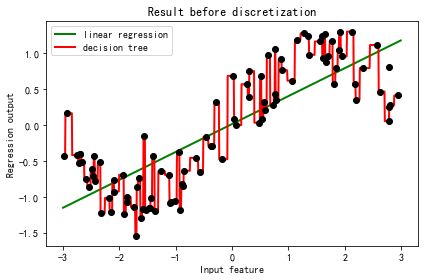

In [6]:
#放置画布
fig, ax1 = plt.subplots(1)
#创建测试数据：一系列分布在横坐标上的点
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
#将测试数据带入predict接口，获得模型的拟合效果并进行绘制
ax1.plot(line, LinearR.predict(line), linewidth=2, color='green',
         label="linear regression")
ax1.plot(line, TreeR.predict(line), linewidth=2, color='red',
         label="decision tree")
#将原数据上的拟合绘制在图像上
ax1.plot(X[:, 0], y, 'o', c='k')
#其他图形选项
ax1.legend(loc="best")
ax1.set_ylabel("Regression output")
ax1.set_xlabel("Input feature")
ax1.set_title("Result before discretization")
plt.tight_layout()
plt.show()

In [12]:
kb = KBinsDiscretizer(n_bins=10, encode='onehot')
X_bin = kb.fit_transform(X)

In [13]:
X_bin = pd.DataFrame(X_bin.toarray())

In [14]:
X_bin

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
LR_ = LinearRegression().fit(X_bin, y)

In [16]:
line_bin = kb.fit_transform(line)

In [17]:
y_pred = LR_.predict(line_bin)

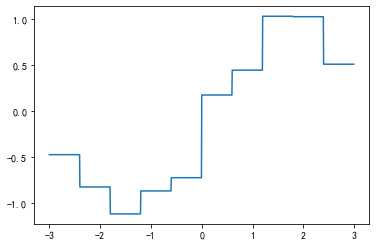

In [18]:
plt.plot(line,y_pred)

In [19]:
from sklearn.datasets import fetch_california_housing as fch
import pandas as pd
housevalue = fch()
X = pd.DataFrame(housevalue.data)
y = housevalue.target
housevalue.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [22]:
X.columns = ["住户收入中位数","房屋使用年代中位数","平均房间数目"
           ,"平均卧室数目","街区人口","平均入住率","街区的纬度","街区的经度"]
poly = PolynomialFeatures(degree=2).fit(X,y)
poly.get_feature_names(X.columns)

['1',
 '住户收入中位数',
 '房屋使用年代中位数',
 '平均房间数目',
 '平均卧室数目',
 '街区人口',
 '平均入住率',
 '街区的纬度',
 '街区的经度',
 '住户收入中位数^2',
 '住户收入中位数 房屋使用年代中位数',
 '住户收入中位数 平均房间数目',
 '住户收入中位数 平均卧室数目',
 '住户收入中位数 街区人口',
 '住户收入中位数 平均入住率',
 '住户收入中位数 街区的纬度',
 '住户收入中位数 街区的经度',
 '房屋使用年代中位数^2',
 '房屋使用年代中位数 平均房间数目',
 '房屋使用年代中位数 平均卧室数目',
 '房屋使用年代中位数 街区人口',
 '房屋使用年代中位数 平均入住率',
 '房屋使用年代中位数 街区的纬度',
 '房屋使用年代中位数 街区的经度',
 '平均房间数目^2',
 '平均房间数目 平均卧室数目',
 '平均房间数目 街区人口',
 '平均房间数目 平均入住率',
 '平均房间数目 街区的纬度',
 '平均房间数目 街区的经度',
 '平均卧室数目^2',
 '平均卧室数目 街区人口',
 '平均卧室数目 平均入住率',
 '平均卧室数目 街区的纬度',
 '平均卧室数目 街区的经度',
 '街区人口^2',
 '街区人口 平均入住率',
 '街区人口 街区的纬度',
 '街区人口 街区的经度',
 '平均入住率^2',
 '平均入住率 街区的纬度',
 '平均入住率 街区的经度',
 '街区的纬度^2',
 '街区的纬度 街区的经度',
 '街区的经度^2']

In [24]:
X_ = poly.transform(X)
#在这之后，我们依然可以直接建立模型，然后使用线性回归的coef_属性来查看什么特征对标签的影响最大
reg = LinearRegression().fit(X_,y)
coef = reg.coef_

In [25]:
[*zip(poly.get_feature_names(X.columns),reg.coef_)]

[('1', 5.919548121324149e-08),
 ('住户收入中位数', -11.243025397930216),
 ('房屋使用年代中位数', -0.8488985412462822),
 ('平均房间数目', 6.441059222123977),
 ('平均卧室数目', -31.591329975971615),
 ('街区人口', 0.0004060906049543038),
 ('平均入住率', 1.0038623302264305),
 ('街区的纬度', 8.705681915084677),
 ('街区的经度', 5.880632747499084),
 ('住户收入中位数^2', -0.03130812596270106),
 ('住户收入中位数 房屋使用年代中位数', 0.0018599468940172742),
 ('住户收入中位数 平均房间数目', 0.04330204064117379),
 ('住户收入中位数 平均卧室数目', -0.18614227722920226),
 ('住户收入中位数 街区人口', 5.7283149769040926e-05),
 ('住户收入中位数 平均入住率', -0.002590194534250867),
 ('住户收入中位数 街区的纬度', -0.15250571707968474),
 ('住户收入中位数 街区的经度', -0.14424294272569388),
 ('房屋使用年代中位数^2', 0.00021172532149725282),
 ('房屋使用年代中位数 平均房间数目', -0.0012621899129989507),
 ('房屋使用年代中位数 平均卧室数目', 0.010611504461670506),
 ('房屋使用年代中位数 街区人口', 2.818851672607165e-06),
 ('房屋使用年代中位数 平均入住率', -0.0018171695297604317),
 ('房屋使用年代中位数 街区的纬度', -0.010069037269025978),
 ('房屋使用年代中位数 街区的经度', -0.009999501736772073),
 ('平均房间数目^2', 0.0072694775097837975),
 ('平均房间数目 平

In [26]:
#放到dataframe中进行排序
coeff = pd.DataFrame([poly.get_feature_names(X.columns),reg.coef_.tolist()]).T
coeff.columns = ["feature","coef"]
coeff.sort_values(by="coef")

,feature,coef
4,平均卧室数目,-31.59133
1,住户收入中位数,-11.243025
2,房屋使用年代中位数,-0.848899
33,平均卧室数目 街区的纬度,-0.437043
34,平均卧室数目 街区的经度,-0.404151
12,住户收入中位数 平均卧室数目,-0.186142
15,住户收入中位数 街区的纬度,-0.152506
16,住户收入中位数 街区的经度,-0.144243
32,平均卧室数目 平均入住率,-0.087191
25,平均房间数目 平均卧室数目,-0.068906


In [38]:
poly = PolynomialFeatures(degree=4).fit(X,y)
X_ = poly.transform(X)
reg = LinearRegression().fit(X,y)
reg.score(X,y)

0.6062326851998051

In [39]:
from time import time
time0 = time()
reg_ = LinearRegression().fit(X_,y)
print("R2:{}".format(reg_.score(X_,y)))
print("time:{}".format(time()-time0))

R2:0.7451418947509028
time:0.3321847915649414


In [29]:
#假设使用其他模型？
from sklearn.ensemble import RandomForestRegressor as RFR
time0 = time()
print("R2:{}".format(RFR(n_estimators=100).fit(X,y).score(X,y)))
print("time:{}".format(time()-time0))

R2:0.9744351935775335
time:10.634949207305908
